### **E-Commerce Shipping Data**
Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

 - ID: ID Number of Customers.
 - Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
 - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
 - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
 - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
 - Cost of the product: Cost of the Product in US Dollars.
 - Prior purchases: The Number of Prior Purchase.
 - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
 - Gender: Male and Female.
 - Discount offered: Discount offered on that specific product.
 - Weight in gms: It is the weight in grams.
 - Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


>This data of Product Shipment Tracking, answer instantly to your questions:

 - What was Customer Rating? And was the product delivered on time?
 - Is Customer query is being answered?
 - If Product importance is high. having higest rating or being delivered on time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Train.csv")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [4]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
data.shape

(10999, 12)

#### **Exploratory Analysis**

In [6]:
#Warehouse with most bought goods

data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

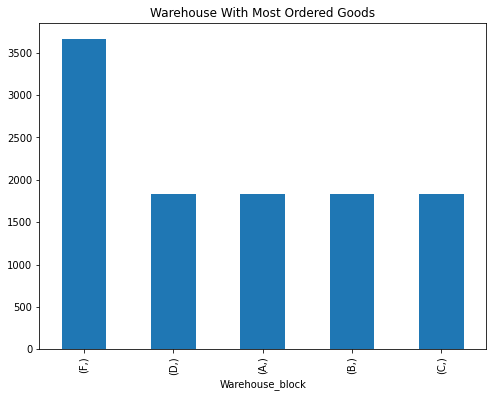

In [7]:

data[['Warehouse_block']].value_counts().plot(kind='bar', figsize=(8,6), title="Warehouse With Most Ordered Goods")

Warehouse F has the most ordered/purchased goods 

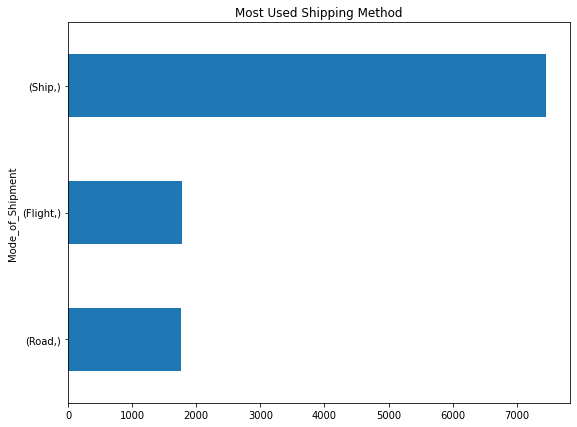

In [8]:
#Most Used Shipped Methods

data[['Mode_of_Shipment']].value_counts().sort_values().plot(kind='barh', figsize=(9,7), title="Most Used Shipping Method")

In [9]:
#Let's find the warehouse with most customer care calls

df = data[['Customer_care_calls', 'Warehouse_block']]
df.groupby('Warehouse_block', as_index=False)['Customer_care_calls'].sum()  

,Warehouse_block,Customer_care_calls
0,A,7402
1,B,7369
2,C,7451
3,D,7434
4,F,14939


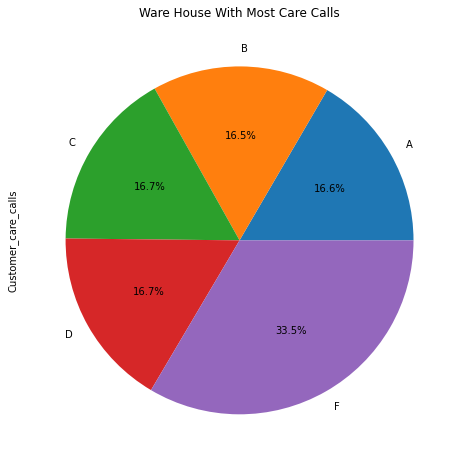

In [10]:
piedf = df.groupby('Warehouse_block')['Customer_care_calls'].sum()

piedf.plot.pie(y='Customer_care_calls', figsize=(8,8), title="Ware House With Most Care Calls", autopct='%1.1f%%')

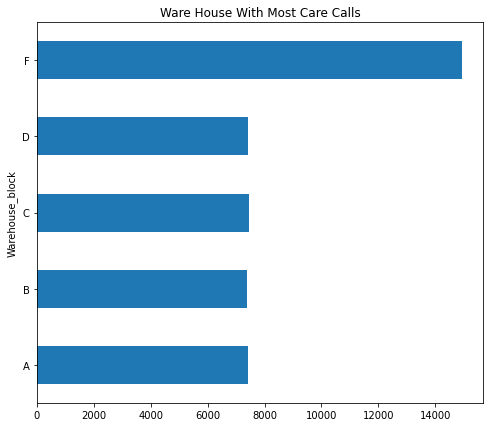

In [11]:
#The human eyes cannot easily interpret bar plots so lets see the above as a bar plot

df.groupby('Warehouse_block')['Customer_care_calls'].sum().plot(kind='barh', figsize=(8,7), title="Ware House With Most Care Calls")

In [12]:
#Lets find out the shipping method with most customer care calls

df = data[['Mode_of_Shipment', 'Customer_care_calls']]
df.groupby('Mode_of_Shipment', as_index=False)['Customer_care_calls'].sum()

,Mode_of_Shipment,Customer_care_calls
0,Flight,7293
1,Road,7151
2,Ship,30151


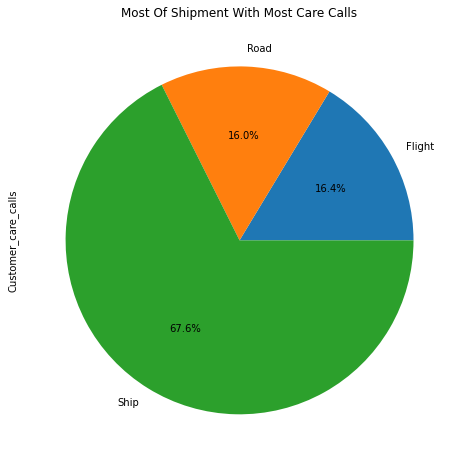

In [13]:
df = df.groupby('Mode_of_Shipment')['Customer_care_calls'].sum()
df.plot.pie(y='Customer_care_calls', figsize=(8,8), title="Most Of Shipment With Most Care Calls", autopct='%1.1f%%')

I want to check if their is a correlation between number of customers purchase and the rating given.

In [14]:
from scipy.stats import spearmanr

num_purchase = data['Prior_purchases']
rating = data['Customer_rating']
(correlation, pValue) = spearmanr(num_purchase, rating)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.01053742256819096
It is not statistically significant.


Apparently, the prior purchase of customers does not correlate with the ratings given. 
Let's test the correlation of all the ratings given to if the product reached on time or not 

In [15]:
discount = data['Discount_offered']
rating = data['Customer_rating']
(correlation, pValue) = spearmanr(discount, rating)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.0022985903752684497
It is not statistically significant.


Lets see the gender with most purchases

In [16]:
df = data[['Gender', 'Prior_purchases']]
df.groupby('Gender', as_index=False)['Prior_purchases'].sum()

,Gender,Prior_purchases
0,F,19861
1,M,19379


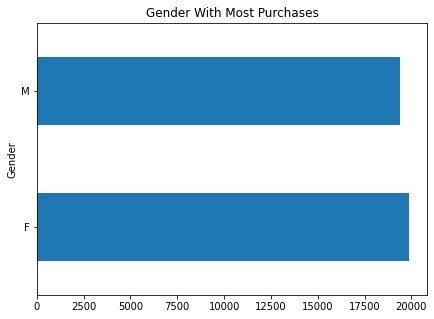

In [17]:
df.groupby('Gender')['Prior_purchases'].sum().plot(kind='barh', figsize=(7,5), title='Gender With Most Purchases')

In [18]:
gender_rating = data[['Gender', 'Customer_rating']]
gender_rating.groupby('Customer_rating')['Gender'].value_counts()

Customer_rating  Gender
1                F         1149
                 M         1086
2                M         1103
                 F         1062
3                F         1143
                 M         1096
4                F         1096
                 M         1093
5                F         1095
                 M         1076
Name: Gender, dtype: int64

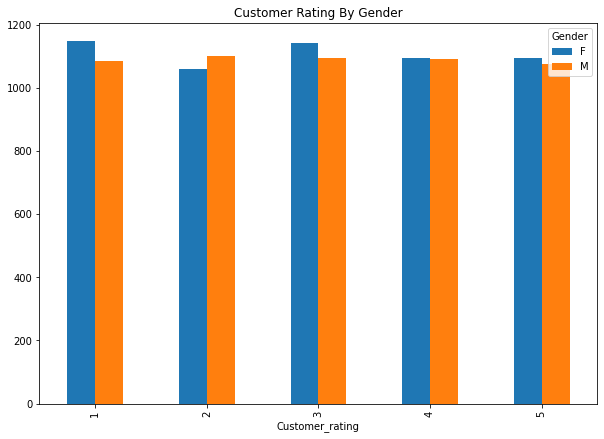

In [19]:
gender_rating.groupby('Customer_rating')['Gender'].value_counts().unstack().plot(kind='bar', figsize=(10,7), title='Customer Rating By Gender')

Let's see the count of products that reached on time Vs which products reached on time

In [20]:
data[['Reached.on.Time_Y.N']].value_counts() 

Reached.on.Time_Y.N
1                      6563
0                      4436
dtype: int64

In [21]:
data['Reached.on.Time_Y.N'] = np.where(data['Reached.on.Time_Y.N'].values ==0, 'On Time', 'Late')

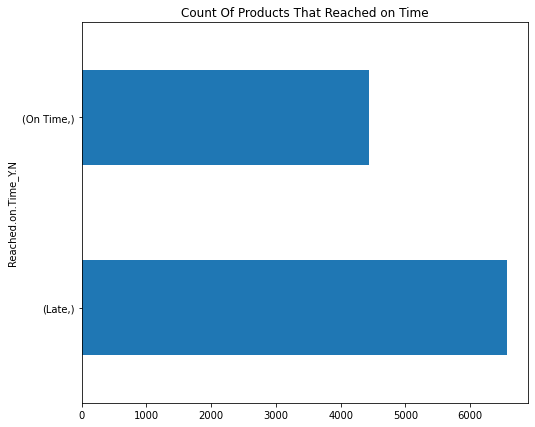

In [22]:
data[['Reached.on.Time_Y.N']].value_counts().plot(kind='barh', figsize=(8,7), title='Count Of Products That Reached on Time')

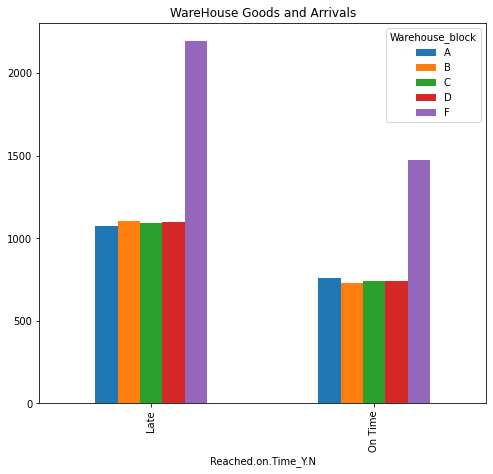

In [23]:
df = data[['Warehouse_block', 'Reached.on.Time_Y.N']]
df.groupby('Reached.on.Time_Y.N')['Warehouse_block'].value_counts().unstack().plot(kind='bar', figsize=(8,7), title="WareHouse Goods and Arrivals")

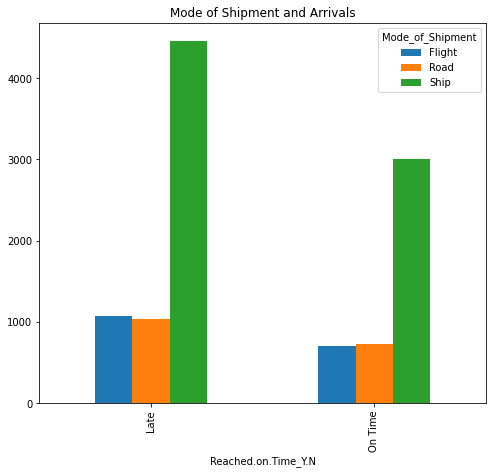

In [24]:
df = data[['Mode_of_Shipment', 'Reached.on.Time_Y.N']]
df.groupby('Reached.on.Time_Y.N')['Mode_of_Shipment'].value_counts().unstack().plot(kind='bar', figsize=(8,7), title="Mode of Shipment and Arrivals")

The above plot clearly shows that we have more late arrivals than goods that reached on time; both for shipped goods and goods sent by flight and road. 

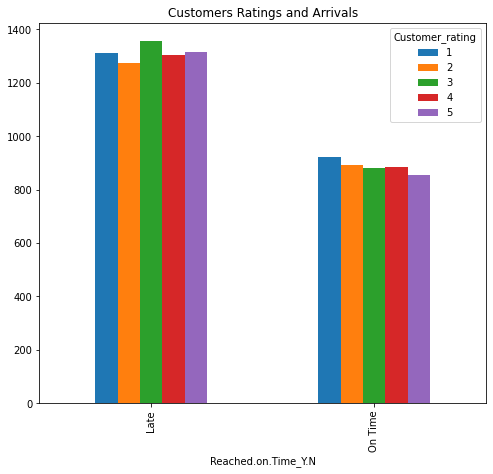

In [25]:
df = data[['Customer_rating', 'Reached.on.Time_Y.N']]
df.groupby('Reached.on.Time_Y.N')['Customer_rating'].value_counts().unstack().plot(kind='bar', figsize=(8,7), title="Customers Ratings and Arrivals")

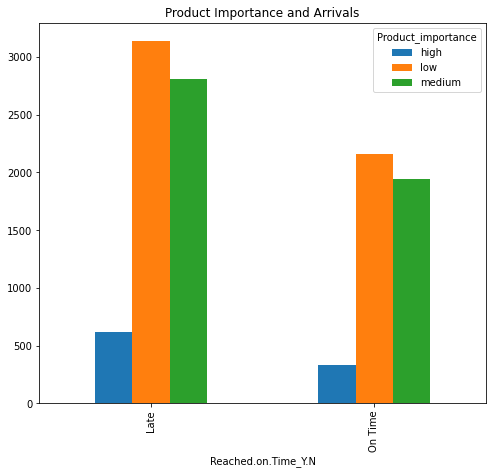

In [26]:
df = data[['Product_importance', 'Reached.on.Time_Y.N']]
df.groupby('Reached.on.Time_Y.N')['Product_importance'].value_counts().unstack().plot(kind='bar', figsize=(8,7), title="Product Importance and Arrivals")

From the plots above, it can be seen that the company has an issue of late delivery and this could be a major factor affecting the customers rating of the goods amongst others.

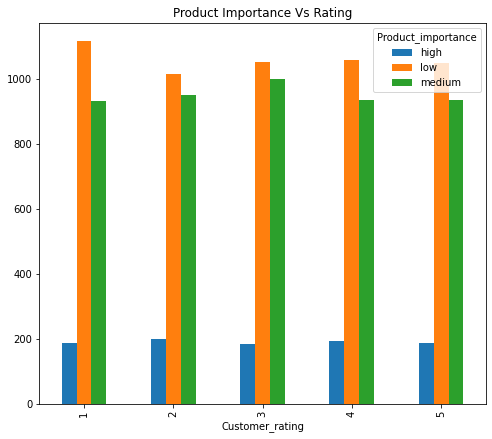

In [27]:
df = data[['Product_importance', 'Customer_rating']]
df.groupby('Customer_rating')['Product_importance'].value_counts().unstack().plot(kind='bar', figsize=(8,7), title="Product Importance Vs Rating")